The purpose of this notebook is to perform an exploratory data analysis of any given sample of GLIMS data. There's a focus on region/locality summaries and visualizations

In [19]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data_label = "localized_time_series_for_training_c02_t1_l2"
glacier_view_dir = os.path.join(os.path.expanduser("~"), "Desktop","projects","GlacierView")
glims_data_dir = os.path.join(glacier_view_dir,"src","glims","data")
glims_path = os.path.join(glims_data_dir, "training_samples", "glims_18k_bb.shp")
metadata_dir = os.path.join(glacier_view_dir,"src","earth_engine","data","processed_metadata",data_label)

In [24]:
df = gpd.read_file(glims_path, index_col = 0)
df['centroid'] = df.geometry.centroid

/var/folders/5x/43pcz5nx3jj7yqs8kjnjpxgc0000gn/T/ipykernel_72781/2182670644.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid'] = df.geometry.centroid


In [25]:
region_map = {
    'Himalaya (India, Nepal, Bhutan)': 'Asia',
    'China': 'Asia',
    'Northern Cordillera':'North America',
    'Canada': 'North America',
    'Argentina': 'South America',
    'Asia':'Asia',
    'Alaska':'North America',
    'Caucausus Region': 'Caucausus',
    'Norway': 'Europe',
    'Swiss Alps': 'Europe',
    'Cordillera Blanca, Peru': 'South America',
    'Austrian Alps': 'Europe',
    'Italy': 'Europe',
    'Mongolia': 'Asia',
    'Chile': 'South America',
    'New Zealand': 'Oceania',
    'Siberian Mountains': 'Asia',
    'Central Asia': 'Asia',
    'Prince William Sound': 'North America',
    'Iran': 'Caucausus',                                                    
    'Olympic Peninsula': 'North America',                                           
    'Russian Glaciers (exact boundaries of RC to be defined)': 'Asia',       
    'Chilean glaciers, between -18 and -56 degrees latitude': 'South America',   
    'Turkey': 'Asia',                                                     
    'Coropuna, Peru': 'South America',                                               
    'Northern Siberia': 'Asia'
}
df['geog_area_rollup'] = df.geog_area.map(region_map)

In [22]:
filtered_training_data = pd.read_csv(os.path.join(metadata_dir,"filtered_training_data.csv"))
filtered_df = df[df['glac_id'].isin(filtered_training_data.glims_id)]

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/5x/43pcz5nx3jj7yqs8kjnjpxgc0000gn/T/ipykernel_72781/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [7]:
df['geog_area_rollup'].value_counts(dropna = False)

geog_area_rollup
Asia             12625
North America     3704
South America      872
Europe             602
Caucausus          255
Oceania             35
Name: count, dtype: int64

In [8]:
filtered_df['geog_area_rollup'].value_counts(dropna = False)

geog_area_rollup
Asia             7459
North America    2214
South America     497
Europe            202
Caucausus          74
Name: count, dtype: int64

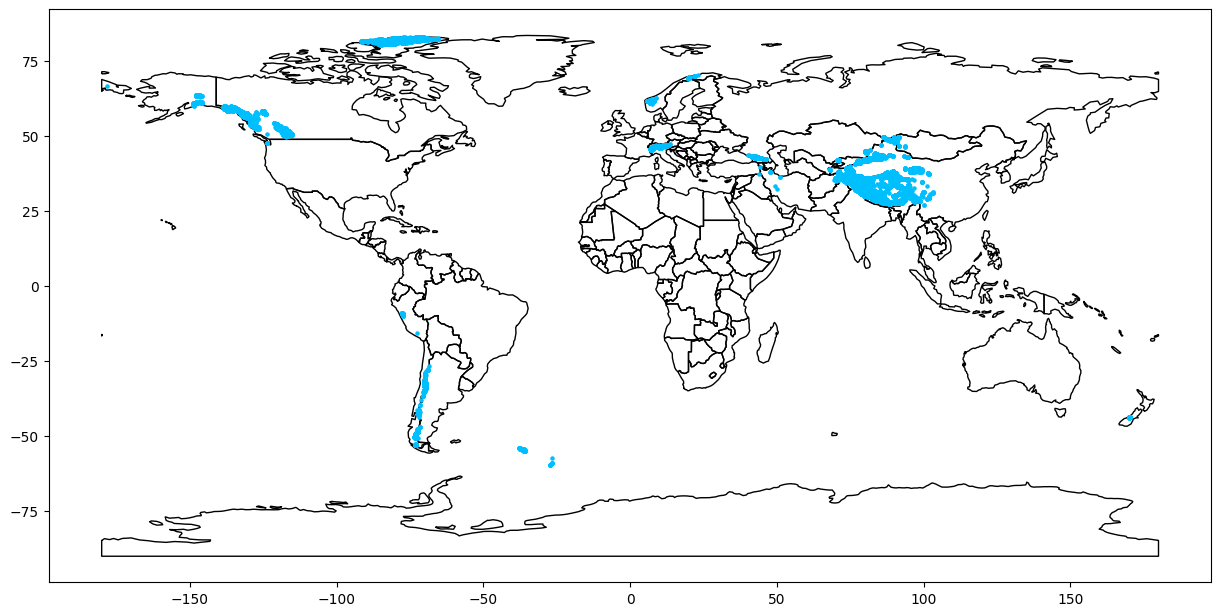

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
world.plot(ax = ax, facecolor="none")
df['centroid'].plot(ax = ax, color = 'deepskyblue', markersize=5)
plt.show()

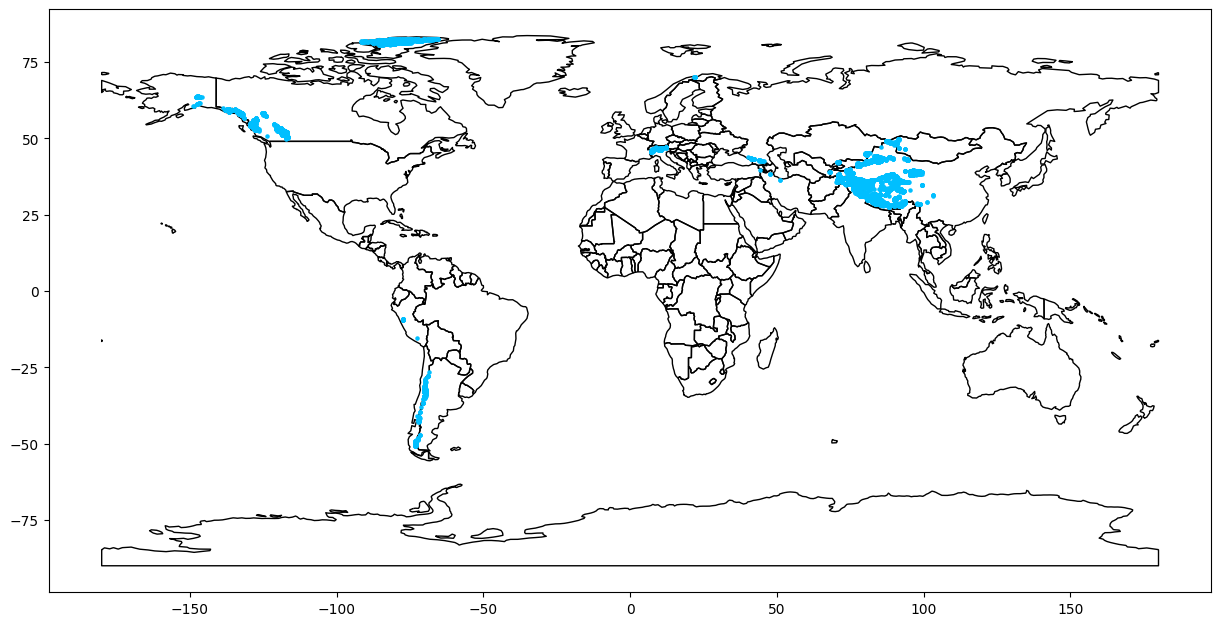

In [10]:
#include topography and latitude/longitude lines
#check the glaciers near greenland
#include vegitation/satellite coloring in map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
world.plot(ax = ax, facecolor="none")
filtered_df['centroid'].plot(ax = ax, color = 'deepskyblue', markersize=5)
plt.show()

In [11]:
df['geog_area_rollup'].value_counts(dropna = False, normalize = True)

geog_area_rollup
Asia             0.697784
North America    0.204720
South America    0.048195
Europe           0.033273
Caucausus        0.014094
Oceania          0.001934
Name: proportion, dtype: float64

In [17]:
sample = pd.read_csv(os.path.join(glims_data_dir, "inference_samples", 'random_sample_43_high_quality.csv'))

In [18]:
df[df.glac_id.isin(sample.glims_id)].geog_area_rollup.value_counts()

geog_area_rollup
North America    43
Name: count, dtype: int64